In [1]:
# part-1 Data Preprocessing

# Importing the liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
# Importing the dataset
dataset = pd.read_csv("D:/python/Churn_Modelling.csv")

In [33]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
x= dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [35]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [36]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [37]:
# Create dummy variables
geography= pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [38]:
## Concatenate the Data Frames

x=pd.concat([x,geography,gender],axis=1)

In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [40]:
## Drop Unnecessary columns

x=x.drop(['Geography','Gender'],axis=1)

In [41]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [42]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [43]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
x_train

array([[ 1.3898594 , -0.27805085, -0.34028423, ..., -0.58312392,
        -0.57157662, -1.09361434],
       [-0.57284679, -1.23779837,  1.04880816, ...,  1.71490137,
        -0.57157662, -1.09361434],
       [-0.82076757, -1.33377312,  0.35426197, ...,  1.71490137,
        -0.57157662,  0.91439913],
       ...,
       [-0.21129565, -0.56597511,  1.39608126, ..., -0.58312392,
        -0.57157662,  0.91439913],
       [ 1.14193862, -0.66194986, -0.34028423, ..., -0.58312392,
         1.74954671, -1.09361434],
       [-1.21330881, -1.62169738,  1.74335435, ...,  1.71490137,
        -0.57157662, -1.09361434]])

In [46]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\Smit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Smit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Smit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Smit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [47]:
# Initialising the ANN
classifier = Sequential()

In [48]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11)) 

C:\Users\Smit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [49]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

C:\Users\Smit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [50]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\Smit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [51]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [52]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\Smit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 576us/step - loss: 0.5448 - accuracy: 0.7826 - val_loss: 0.4979 - val_accuracy: 0.8023
Epoch 2/100
5359/5359 [==============================] - 1s 212us/step - loss: 0.4856 - accuracy: 0.8029 - val_loss: 0.4707 - val_accuracy: 0.8054
Epoch 3/100
5359/5359 [==============================] - 1s 207us/step - loss: 0.4661 - accuracy: 0.8046 - val_loss: 0.4591 - val_accuracy: 0.8058
Epoch 4/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4562 - accuracy: 0.8059 - val_loss: 0.4523 - val_accuracy: 0.8092
Epoch 5/100
5359/5359 [==============================] - 1s 201us/step - loss: 0.4504 - accuracy: 0.8067 - val_loss: 0.4478 - val_accuracy: 0.8080
Epoch 6/100
5359/5359 [==============================] - 1s 155us/step - loss: 0.4462 - accuracy: 0.8071 - val_loss: 0.4442 - val_accuracy: 0.8107
Epoch 7/100
5359/5359 [==============================] - 1s 143us/ste

Epoch 55/100
5359/5359 [==============================] - 1s 144us/step - loss: 0.3429 - accuracy: 0.8597 - val_loss: 0.3342 - val_accuracy: 0.8675
Epoch 56/100
5359/5359 [==============================] - 1s 142us/step - loss: 0.3428 - accuracy: 0.8591 - val_loss: 0.3343 - val_accuracy: 0.8694
Epoch 57/100
5359/5359 [==============================] - 1s 155us/step - loss: 0.3430 - accuracy: 0.8610 - val_loss: 0.3338 - val_accuracy: 0.8697
Epoch 58/100
5359/5359 [==============================] - 1s 154us/step - loss: 0.3425 - accuracy: 0.8597 - val_loss: 0.3335 - val_accuracy: 0.8690
Epoch 59/100
5359/5359 [==============================] - 1s 146us/step - loss: 0.3424 - accuracy: 0.8599 - val_loss: 0.3335 - val_accuracy: 0.8701
Epoch 60/100
5359/5359 [==============================] - 1s 143us/step - loss: 0.3420 - accuracy: 0.8593 - val_loss: 0.3350 - val_accuracy: 0.8686
Epoch 61/100
5359/5359 [==============================] - 1s 148us/step - loss: 0.3421 - accuracy: 0.8602 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


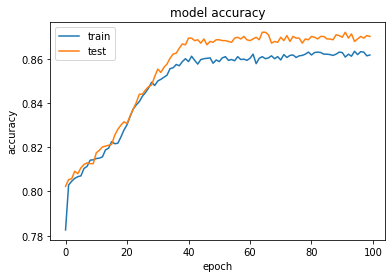

In [57]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

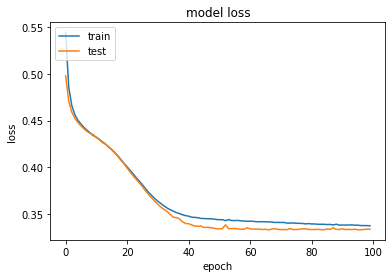

In [58]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 210,  195]], dtype=int64)

In [63]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8595